## Machine Learning - Supervised - Regression Models

### Dataset : RedWineQuality
### https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

**Input variables (based on physicochemical tests):**
* 1 - fixed acidity 
* 2 - volatile acidity
* 3 - citric acid
* 4 - residual sugar
* 5 - chlorides
* 6 - free sulfur dioxide
* 7 - total sulfur dioxide
* 8 - density
* 9 - pH
* 10 - sulphates
* 11 - alcohol

**Output variable (based on sensory data):**
* 12 - quality (score between 0 and 10)

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import warning library
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Matplotlib for the visualization
%matplotlib inline

In [4]:
# Read the Red Wine quality dataset and display the set 
data_wine = pd.read_csv("winequalityred.csv")
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1. Data Clearance

In [5]:
# Check the dtype
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Check the null values
data_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Check the dataset statistics
data_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
# Rename the columns
data_wine = data_wine.rename(columns = {'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 
                               'residual sugar':'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'})
data_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# Replace the values as 0 and 1 in the 'Quality' target column
data_wine['quality'] = np.where(data_wine['quality'] > 5, 1, 0)

In [10]:
# Check the dataset
data_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [11]:
# Check for the unique value in 'quality' column
data_wine['quality'].unique()

array([0, 1])

In [12]:
# Numeric datatypes from dataset 
numeric_types = [numeric for numeric in data_wine.columns if data_wine[numeric].dtypes != 'O']
print(numeric_types)
print("Number of numeric datatypes in set:", len(numeric_types))

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Number of numeric datatypes in set: 12


In [13]:
# Discrete datatypes from dataset
discrete_types = [discrete for discrete in numeric_types if len(data_wine[discrete].unique())<=25]
print(discrete_types)
print("Number of discrete datatypes in set:", len(discrete_types))

['quality']
Number of discrete datatypes in set: 1


In [14]:
# Continuous datatypes from dataset
continuous_types = [continuous for continuous in numeric_types if continuous not in discrete_types]
print(continuous_types)
print("Number of continuous datatypes in set:", len(continuous_types))             

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Number of continuous datatypes in set: 11


In [15]:
# Categorical datatypes from dataset
# There is not categorical datatype
categorical_types = [cat for cat in data_wine.columns
                     if data_wine[cat].dtypes == 'O']
print(categorical_types)
print("Number of categorical datatypes in set:", len(categorical_types))

[]
Number of categorical datatypes in set: 0


In [16]:
data_wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## 2. Data Visualization

<Axes: >

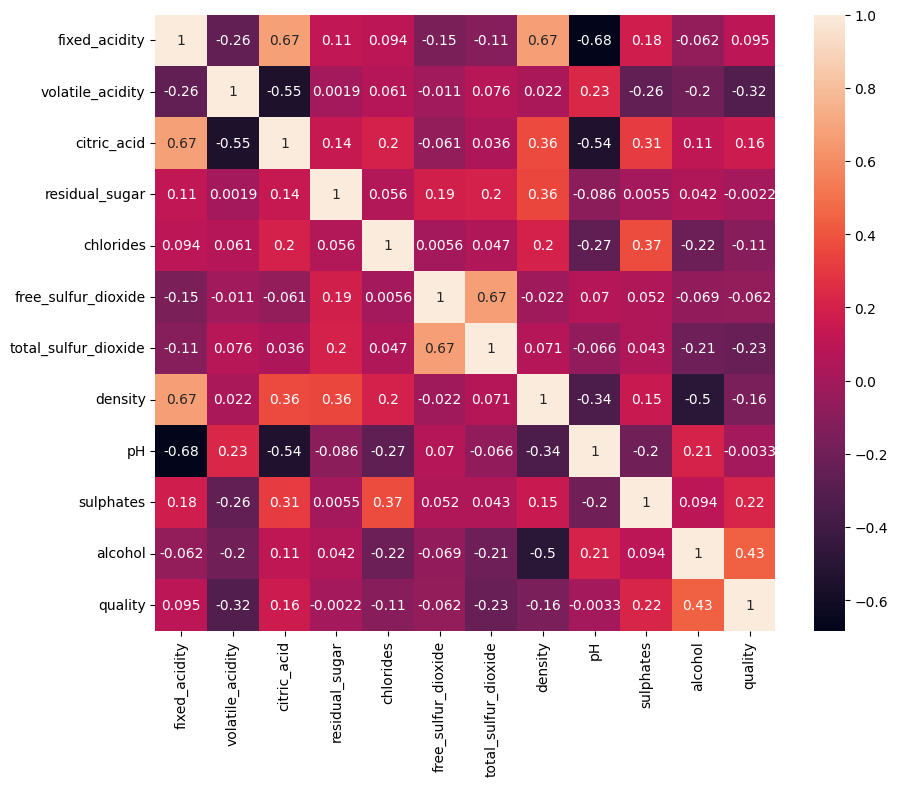

In [17]:
# Check for the correlations
correlation_matrix = data_wine.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True)

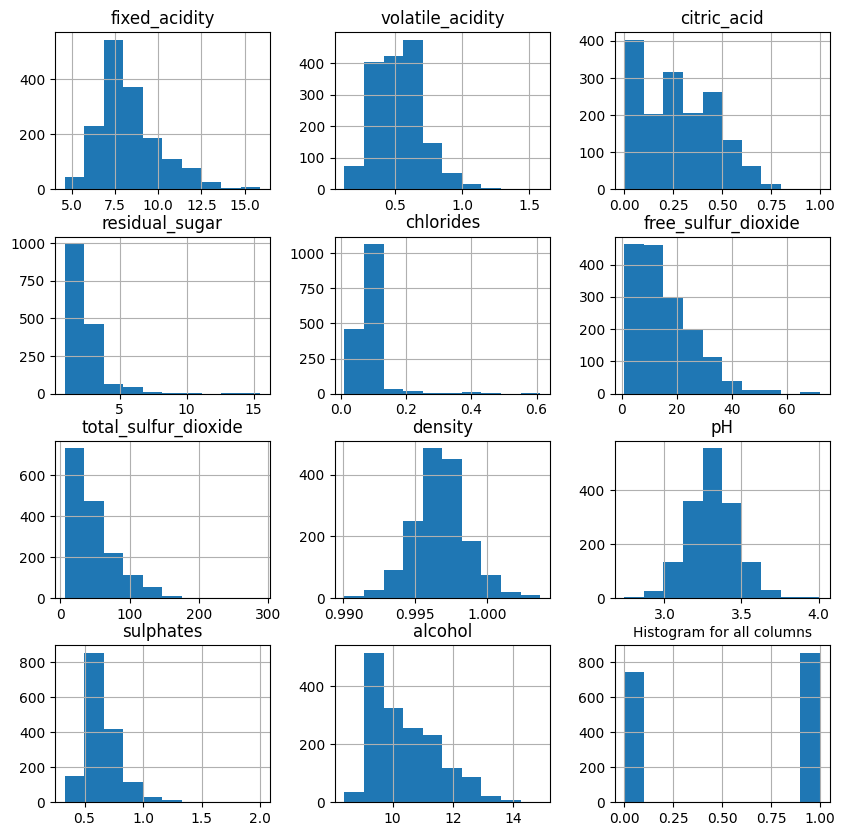

In [18]:
# Distributions for the dataset
data_wine.hist(figsize = (10,10), bins = 10)
plt.title("Histogram for all columns", fontsize = 10)
plt.show()

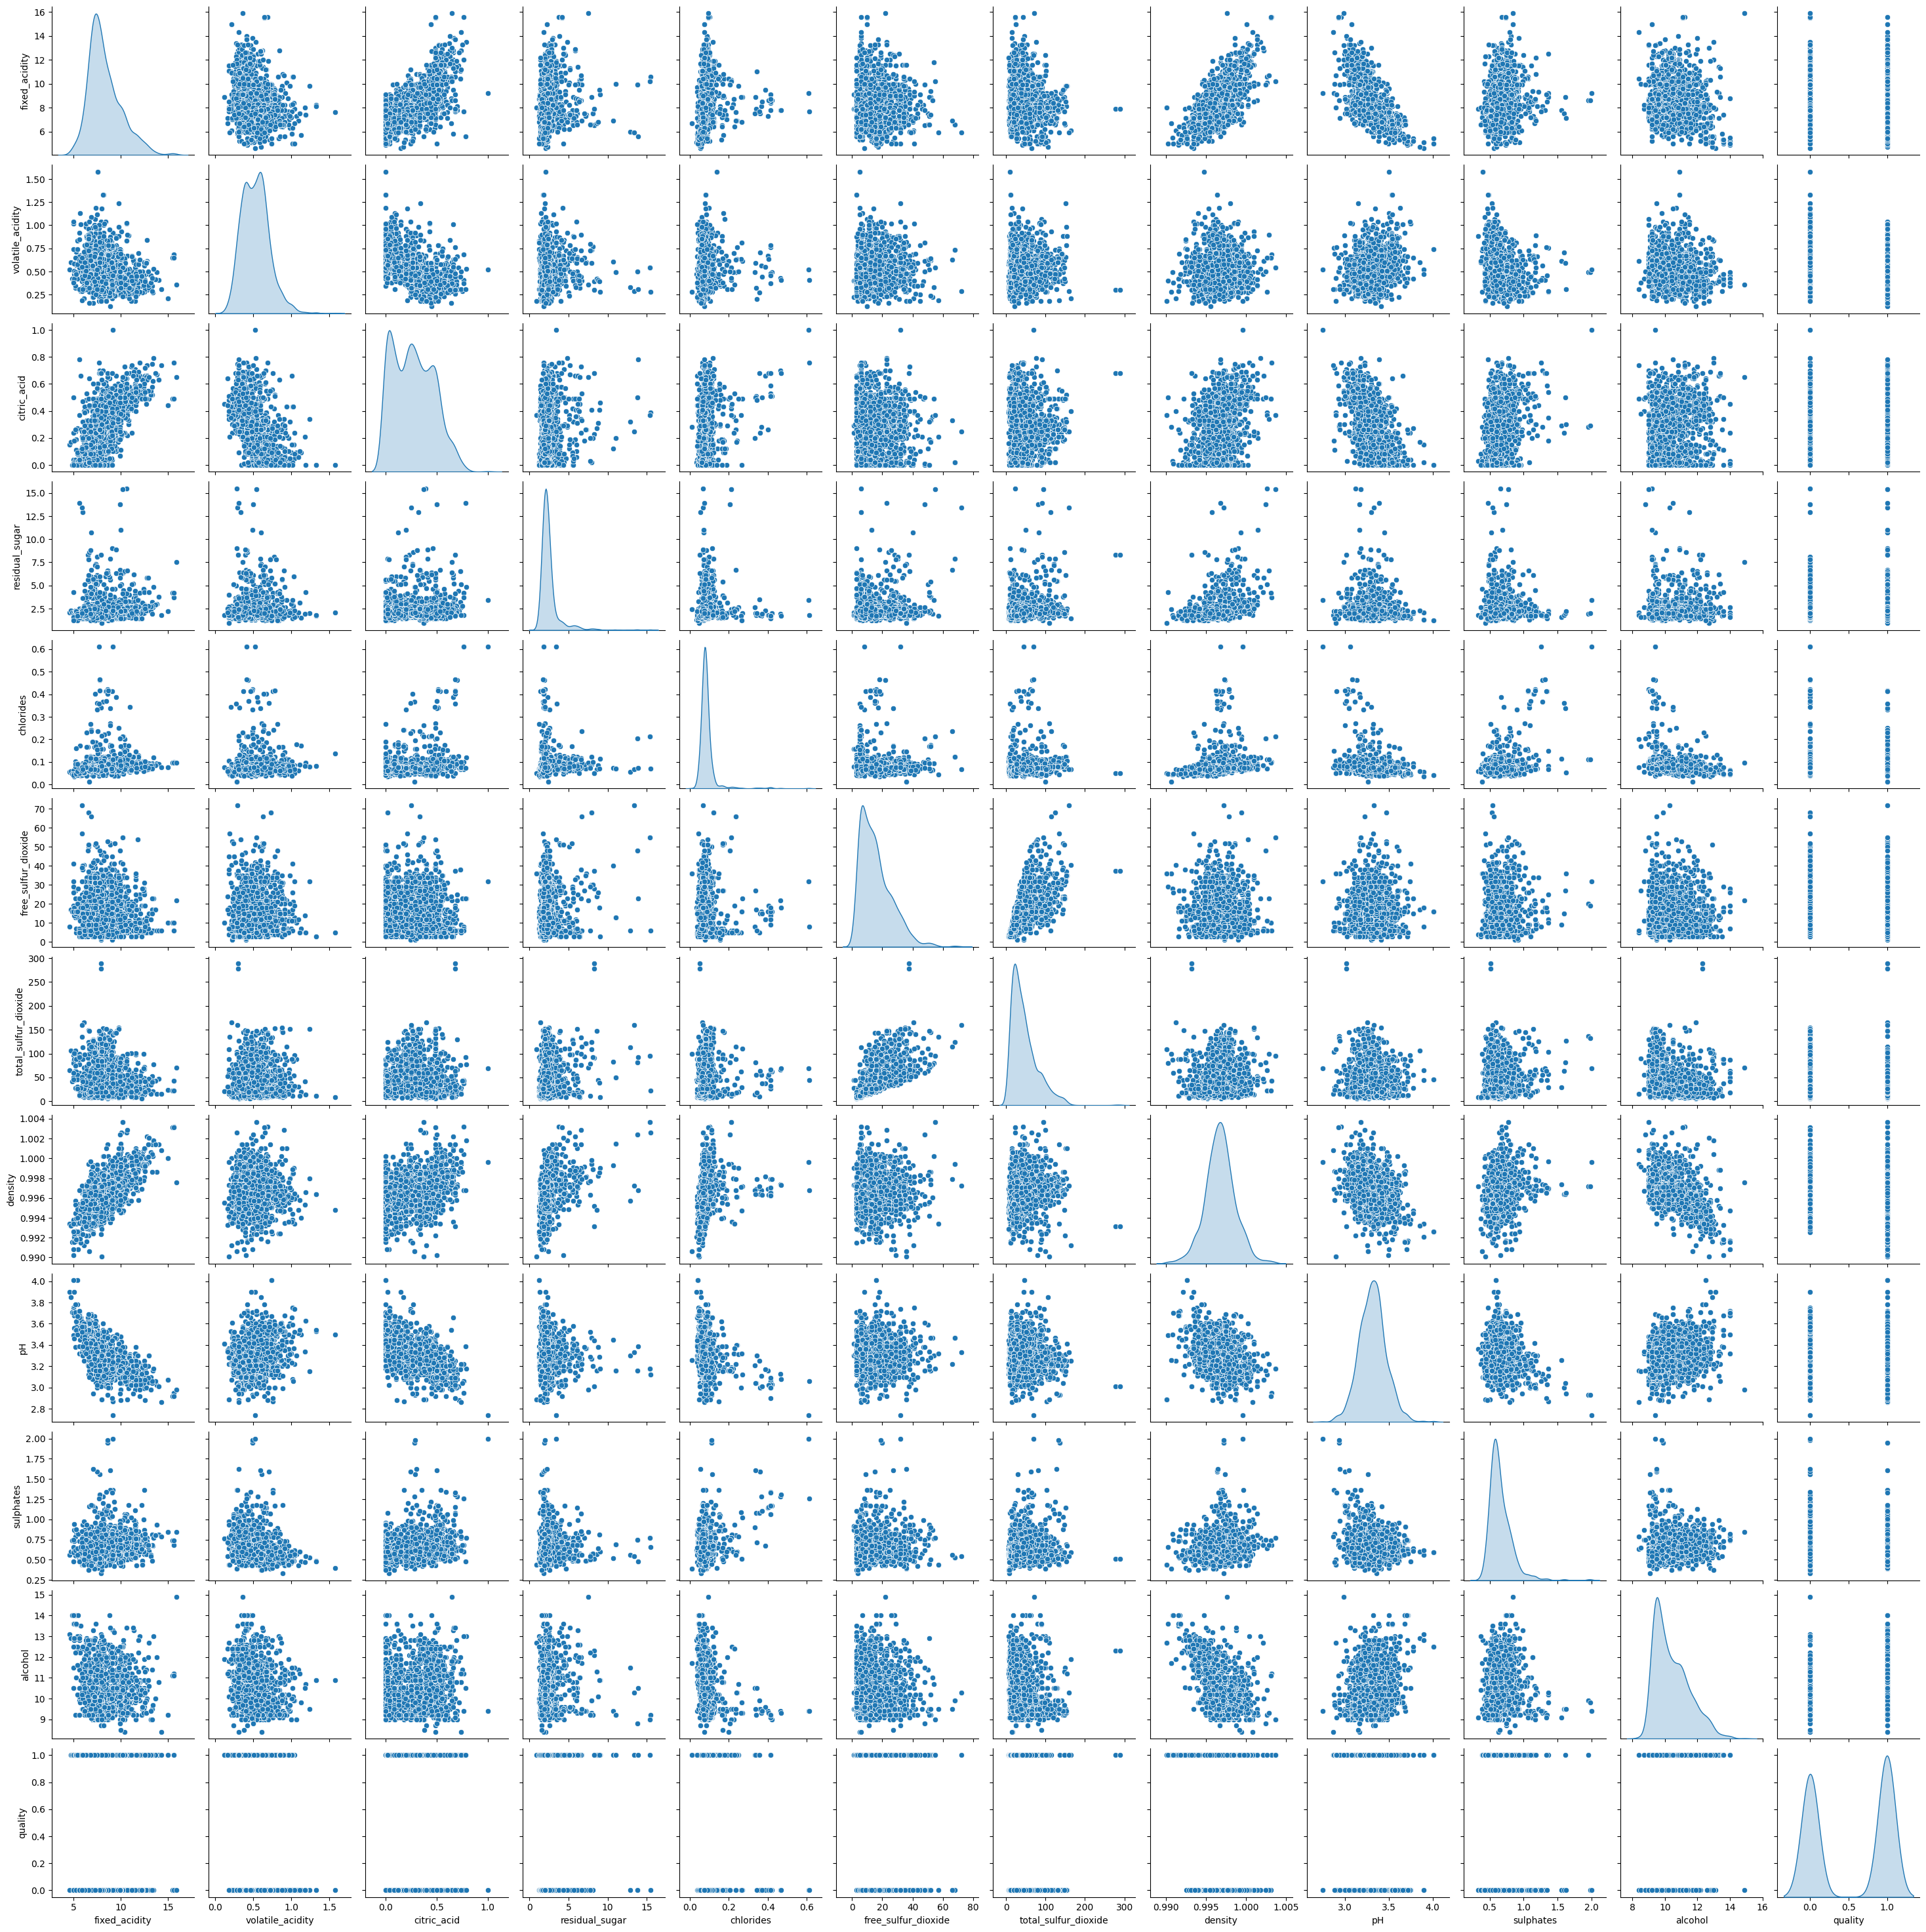

In [19]:
# Pairplots for the dataset
sns.pairplot(data_wine, diag_kind='kde')
plt.show()

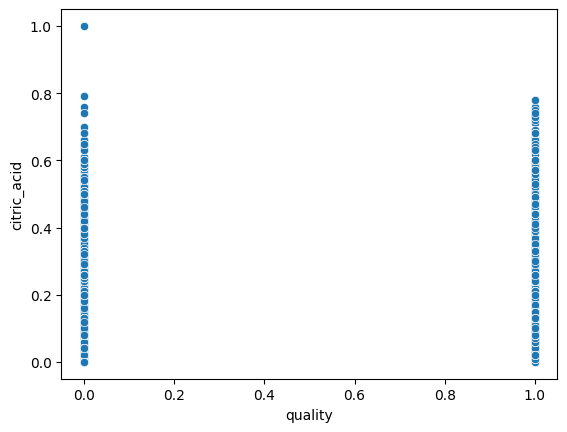

In [20]:
# Scatter plots
sns.scatterplot(data = data_wine, x = 'quality', y = 'citric_acid')
plt.show()

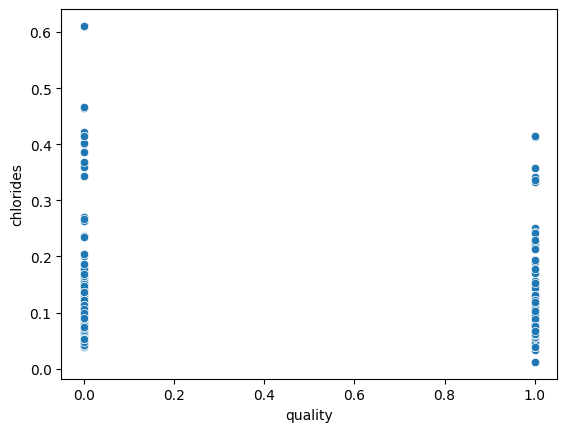

In [21]:
sns.scatterplot(data = data_wine, x = 'quality', y = 'chlorides')
plt.show()

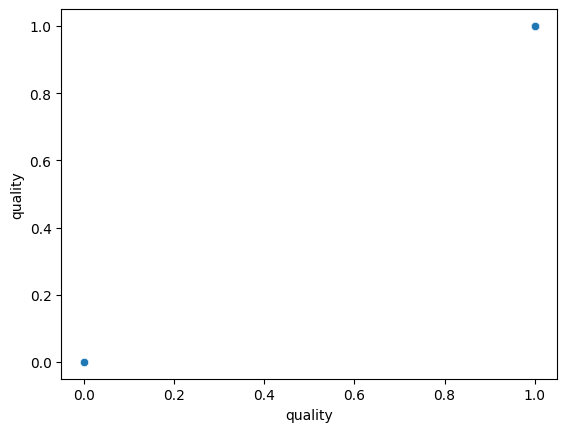

In [22]:
sns.scatterplot(data = data_wine, x = 'quality', y = 'quality')
plt.show()

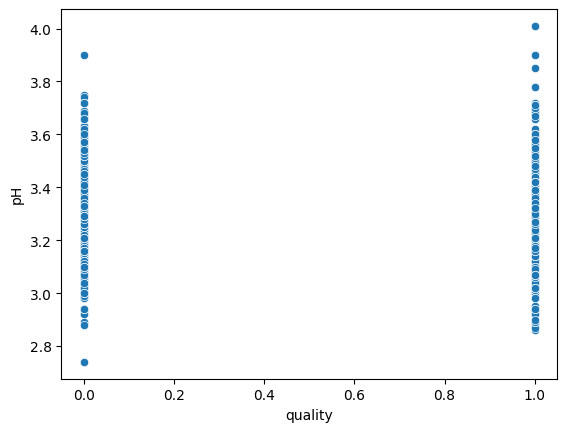

In [23]:
sns.scatterplot(data = data_wine, x = 'quality', y = 'pH')
plt.show()

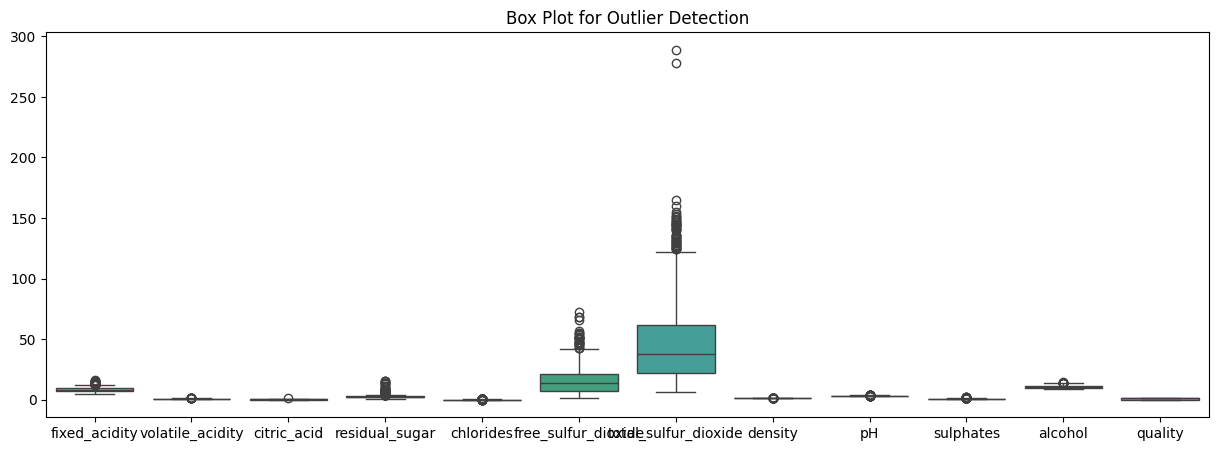

In [24]:
# Check for the Outliers
plt.figure(figsize = (15, 5))
sns.boxplot(data = data_wine)
plt.title("Box Plot for Outlier Detection")
plt.show()

## 3. Feature/Independent and Target/Dependent Splits

In [25]:
# Feature Split
x_feature = data_wine.drop('quality', axis = 1).values
x_feature

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]],
      shape=(1599, 11))

In [26]:
# Target
y_target = data_wine['quality'].values
y_target

array([0, 0, 0, ..., 1, 0, 1], shape=(1599,))

## 4. Train and Test Split

In [27]:
# Import the library
from sklearn.model_selection import train_test_split

In [28]:
# Split the train and test set
x_train, x_test, y_train, y_test = train_test_split(x_feature, y_target, test_size = 0.25, random_state = 42)

In [29]:
# Training and testing features set
print("Training feature set:", x_train)
print("-----------------------------------------------------------------------")
print("Testing feature set:", x_test)

Training feature set: [[11.7   0.49  0.49 ...  3.19  0.43  9.2 ]
 [ 8.8   0.6   0.29 ...  3.36  0.49  9.1 ]
 [ 7.1   0.59  0.   ...  3.42  0.55 11.5 ]
 ...
 [ 7.2   0.62  0.06 ...  3.51  0.54  9.5 ]
 [ 7.9   0.2   0.35 ...  3.32  0.8  11.9 ]
 [ 5.8   0.29  0.26 ...  3.39  0.54 13.5 ]]
-----------------------------------------------------------------------
Testing feature set: [[ 7.7   0.56  0.08 ...  3.24  0.66  9.6 ]
 [ 7.8   0.5   0.17 ...  3.39  0.48  9.5 ]
 [10.7   0.67  0.22 ...  3.28  0.98  9.9 ]
 ...
 [ 7.1   0.6   0.   ...  3.47  0.7   9.9 ]
 [ 7.8   0.62  0.05 ...  3.29  0.63  9.3 ]
 [10.6   0.36  0.57 ...  3.14  0.72 11.1 ]]


In [30]:
# Check the length of trian and test set
print("Length of training set:", len(x_train))
print("Length of testing set:", len(x_test))

Length of training set: 1199
Length of testing set: 400


## 5. Scaling

In [31]:
# Standardization the features
# Import the library
# Define the standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [32]:
# Training and Testing set
print("Training feature set after scaling:", x_train)
print("------------------------------------------------------------------------------------------------")
print("Testing feature set after scaling:", x_test)

Training feature set after scaling: [[ 1.97418149 -0.23260309  1.11458849 ... -0.78641859 -1.3131938
  -1.15257747]
 [ 0.28189382  0.37802632  0.09088663 ...  0.3161036  -0.97064635
  -1.24703683]
 [-0.71013687  0.32251456 -1.39348108 ...  0.70522908 -0.62809889
   1.01998773]
 ...
 [-0.65178213  0.48904985 -1.08637052 ...  1.28891729 -0.68519014
  -0.8691994 ]
 [-0.2432989  -1.84244427  0.39799719 ...  0.05668661  0.79918216
   1.39782516]
 [-1.46874859 -1.34283839 -0.06266865 ...  0.51066634 -0.68519014
   2.90917487]]
------------------------------------------------------------------------------------------------
Testing feature set after scaling: [[-0.34515185  0.25381745 -0.97086479 ... -0.45663065  0.04935995
  -0.76620052]
 [-0.29016948 -0.08908257 -0.50404053 ...  0.51251824 -1.14322934
  -0.85836116]
 [ 1.30431937  0.88246748 -0.24469372 ... -0.19819095  2.16951867
  -0.4897186 ]
 ...
 [-0.6750461   0.48241746 -1.38581969 ...  1.02939765  0.31437979
  -0.4897186 ]
 [-0.2901694

## 6. Import the Models
### (1) Logistics Regression

In [33]:
# Import the logistics regression library
from sklearn.linear_model import LogisticRegression

# Define the function
logistic_regression = LogisticRegression()

# Fit the model
logistic_regression.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [35]:
# Find the Logistics Regression Intercept
intercept = logistic_regression.intercept_
print("The intercept for the model is:", intercept)

The intercept for the model is: [0.20093234]


In [36]:
# Coefficient for the Linear Regression model
coefficient = logistic_regression.coef_
print("Coefficients for the model:", coefficient)

Coefficients for the model: [[ 2.03795684e-01 -5.31254790e-01 -1.81003351e-01  3.03633978e-02
  -1.67205733e-01  2.68893218e-01 -6.08738206e-01 -1.08196232e-01
  -4.09002331e-04  4.56393215e-01  9.44645349e-01]]


In [34]:
# Predict the data
y_pred = logistic_regression.predict(x_test)

# Print the y_pred
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

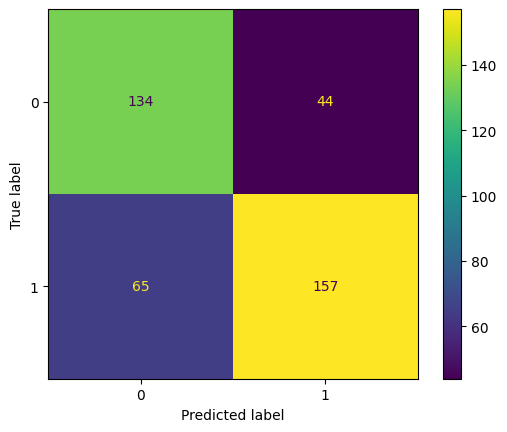

In [37]:
# Import the libraries
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for the Logistic Regression
con_matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = con_matrix)
display.plot()
plt.show()

In [56]:
# Check for the accuracy score
logistic_accuracy_score = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy Score:", logistic_accuracy_score)

Logistic Regression Accuracy Score: 0.7075


In [40]:
# Compute the clasification report (F1, Recall and Precision)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       178
           1       0.78      0.71      0.74       222

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



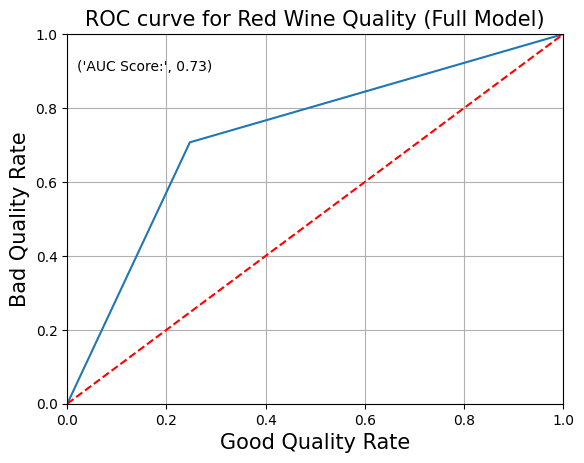

In [42]:
# The roc_curve() returns the values for false positive rate, true positive rate and threshold
# Pass the actual target values and predicted probabilities to the function
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Red Wine Quality (Full Model)', fontsize = 15)
plt.xlabel('False positive rate', fontsize = 15)
plt.ylabel('True positive rate', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))

# plot the grid
plt.grid(True)

In [47]:
# Defining the sigmoid function
def sigmoid(x):
  return 1/(1 + np.exp(-x))

z = np.array(x_train)
probabilities = sigmoid(z)

print("Raw data:", z)
print("------------------------------------------------------------------------------------------------")
print("Sigmoid probabilities:", probabilities)

Raw data: [[ 1.97418149 -0.23260309  1.11458849 ... -0.78641859 -1.3131938
  -1.15257747]
 [ 0.28189382  0.37802632  0.09088663 ...  0.3161036  -0.97064635
  -1.24703683]
 [-0.71013687  0.32251456 -1.39348108 ...  0.70522908 -0.62809889
   1.01998773]
 ...
 [-0.65178213  0.48904985 -1.08637052 ...  1.28891729 -0.68519014
  -0.8691994 ]
 [-0.2432989  -1.84244427  0.39799719 ...  0.05668661  0.79918216
   1.39782516]
 [-1.46874859 -1.34283839 -0.06266865 ...  0.51066634 -0.68519014
   2.90917487]]
------------------------------------------------------------------------------------------------
Sigmoid probabilities: [[0.87805954 0.44211    0.75298356 ... 0.31293818 0.2119529  0.24001861]
 [0.57001046 0.59339699 0.52270603 ... 0.57837438 0.27475169 0.2232135 ]
 [0.3295686  0.57993695 0.1988526  ... 0.6693461  0.34794173 0.73497021]
 ...
 [0.34258805 0.61988258 0.25230235 ... 0.78396387 0.3351039  0.29542092]
 [0.43947355 0.13676247 0.59820637 ... 0.51416786 0.68979951 0.80183855]
 [0.18713

### ------------------------------- End of Logistics Regression --------------------------------------------------------

## (2) Decision Tree Classification

In [48]:
# Import the Decision tree classification library
from sklearn.tree import DecisionTreeClassifier

# Define the function
decision_tree_classification = DecisionTreeClassifier()

# Fit the data
decision_tree_classification.fit(x_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

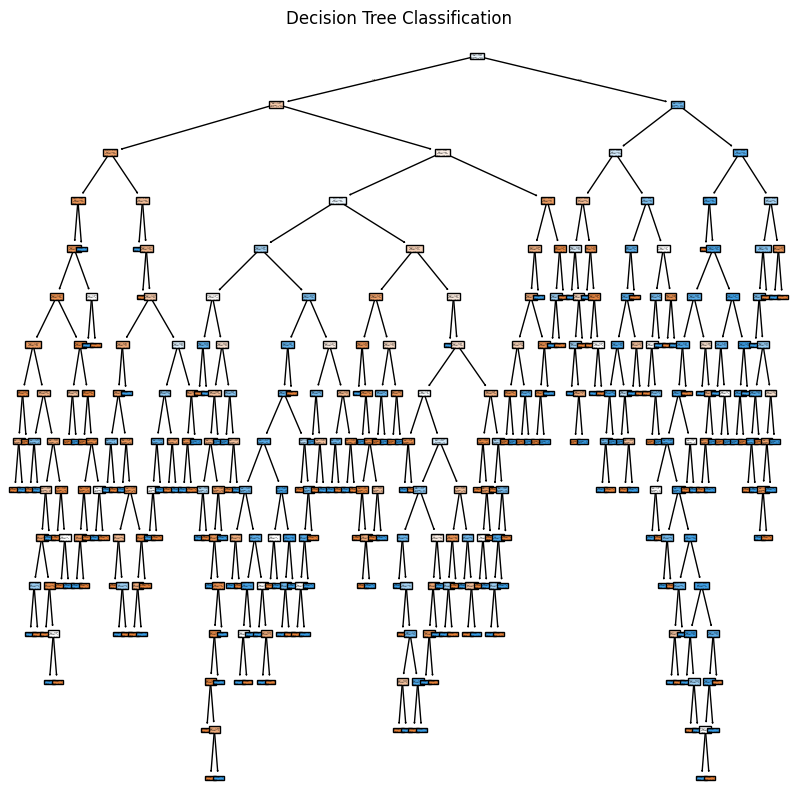

In [51]:
# Import the plot tree
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize = (10,10))
plot_tree(decision_tree_classification, filled = True)
plt.title("Decision Tree Classification")
plt.show()

In [53]:
# Predict the data 
y_dc_pred = decision_tree_classification.predict(x_test)

# Print the y_pred data
y_dc_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

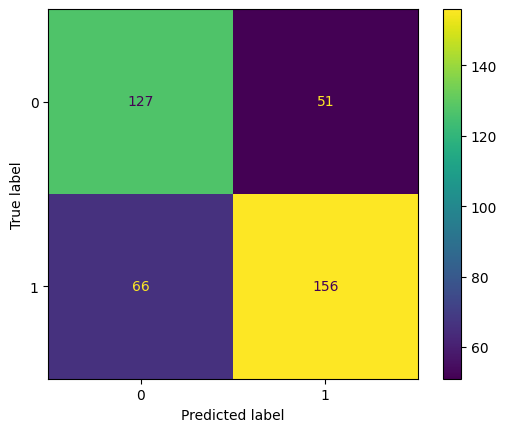

In [54]:
# Confusion matrix for the Decision Tree Classification
con_matrix = confusion_matrix(y_test, y_dc_pred)
display = ConfusionMatrixDisplay(confusion_matrix = con_matrix)
display.plot()
plt.show()

In [55]:
# Check for the accuracy score
decisiontree_accuracy_score = accuracy_score(y_test, y_dc_pred)
print("Decision Tree Classification Accuracy Score:", decisiontree_accuracy_score)

Decision Tree Classification Accuracy Score: 0.7075


In [57]:
# Print the Classification report
class_report = classification_report(y_test, y_dc_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.66      0.71      0.68       178
           1       0.75      0.70      0.73       222

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



In [58]:
# Decision Tree Classifier Prepruning and Hyperparameter Tuning
parameter = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto', 'sqrt', 'log2']
}
parameter

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [59]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Assign the GridSearchCV function
grid = GridSearchCV(
    estimator = decision_tree_classification, 
    param_grid = parameter, 
    cv = 5, 
    scoring = 'accuracy'
)

In [60]:
# Fit the training set in grid
grid.fit(x_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fol

In [61]:
# Check the best parameter and the best score
print("Best Parameter:", grid.best_params_)
print("Score:", grid.best_score_)

Best Parameter: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'splitter': 'best'}
Score: 0.7273570432357044


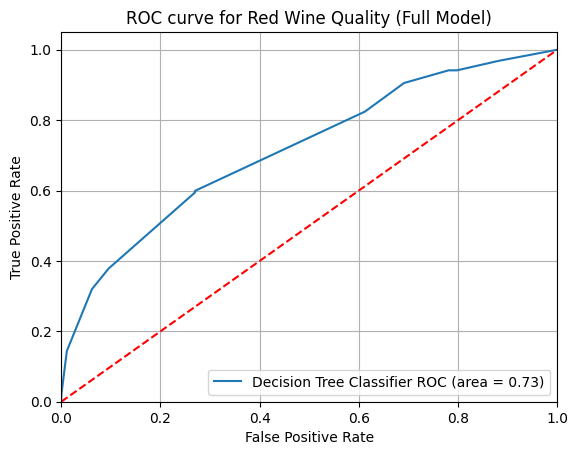

In [120]:
# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Decision Tree Classifier',
    'model':DecisionTreeClassifier(min_samples_split=2,
                                                        max_depth=4,
                                                        max_features='sqrt',
                                                        criterion='gini'),
    'auc':  0.7273
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(x_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Red Wine Quality (Full Model)')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.grid(True)
plt.show() 

### ---------------------------------- End of Decision Tree Classification -----------------------------------

## (3) KNN ( K - Nearest Neighbour) Classification

In [62]:
# Import the KNN
from sklearn.neighbors import KNeighborsClassifier

# Define the function
knn_classification = KNeighborsClassifier()

# Fit the data
knn_classification.fit(x_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [63]:
# Predict the data 
y_knn_pred = knn_classification.predict(x_test)

# Print the y_pred data
y_knn_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,

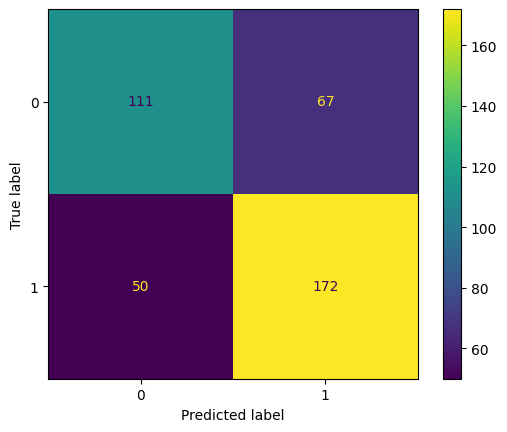

In [64]:
# Confusion matrix for the KNN Classification
con_matrix = confusion_matrix(y_test, y_knn_pred)
display = ConfusionMatrixDisplay(confusion_matrix = con_matrix)
display.plot()
plt.show()

In [65]:
# Check for the accuracy score
knn_accuracy_score = accuracy_score(y_test, y_knn_pred)
print("KNN Classification Accuracy Score:", knn_accuracy_score)

KNN Classification Accuracy Score: 0.7075


In [66]:
# Print the Classification report
class_report = classification_report(y_test, y_knn_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.69      0.62      0.65       178
           1       0.72      0.77      0.75       222

    accuracy                           0.71       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.71      0.71      0.71       400



In [68]:
# Define the KNN parameters
knn_parameter = {
    'n_neighbors': [3, 5, 7, 9],
    'weights' : ['uniform', 'distance'],
    'p' : [1,2],
    'algorithm' : ['auto'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn_parameter

{'n_neighbors': [3, 5, 7, 9],
 'weights': ['uniform', 'distance'],
 'p': [1, 2],
 'algorithm': ['auto'],
 'metric': ['euclidean', 'manhattan', 'minkowski']}

In [69]:
# Define the grid search
grid = GridSearchCV(
    estimator = knn_classification, 
    param_grid = knn_parameter, 
    cv = 5, 
    scoring = 'accuracy', 
    verbose = 1
)

# Fit the data
grid.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'algorithm': ['auto'], 'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': [3, 5, ...], 'p': [1, 2], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate 

In [70]:
# Check the best parameter and the best score
print("Best Parameter:", grid.best_params_)
print("Score:", grid.best_score_)

Best Parameter: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Score: 0.7898361227336123


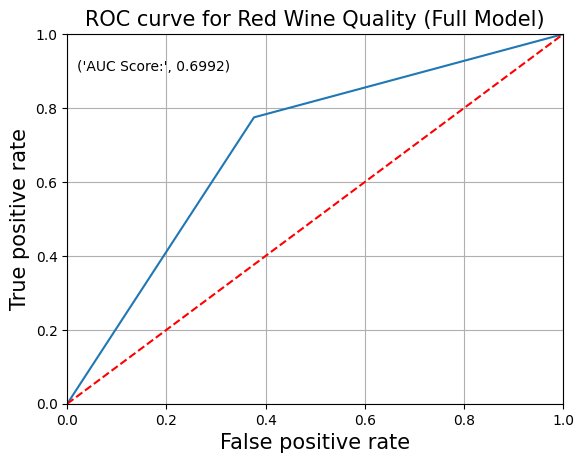

In [112]:
fpr, tpr, thresholds = roc_curve(y_test, y_knn_pred)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Red Wine Quality (Full Model)', fontsize = 15)
plt.xlabel('False positive rate', fontsize = 15)
plt.ylabel('True positive rate', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_knn_pred),4)))

# plot the grid
plt.grid(True)

### ------------------------------------ End of KNN Classification -------------------------------------------------------

## (4) Random Forest Clasiification

In [77]:
# Import all the libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [78]:
# Assign the models
models = {
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}

In [81]:
# Training set performance
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted) # Calculate Accuracy
    f1score = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted) # Calculate Recall
    rocauc_score = roc_auc_score(true, predicted)
    return accuracy, f1score, precision, recall, rocauc_score

In [82]:
# Model performance for Training set
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)

    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_f1score, model_train_precision, model_train_recall, model_train_rocauc_score = evaluate_model(y_train, y_train_pred)

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1score))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
  
    print('----------------------------------')
    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.7548
- F1 score: 0.7656
- Precision: 0.7729
- Recall: 0.7583
- Roc Auc Score: 0.7546
----------------------------------


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------


Gradient Boost
Model performance for Training set
- Accuracy: 0.8791
- F1 score: 0.8850
- Precision: 0.8885
- Recall: 0.8815
- Roc Auc Score: 0.8789
----------------------------------




In [86]:
# Model performance for Test set
for i in range(len(list(models))):
    model = list(models.values())[i]

    # Make predictions
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    model_test_accuracy, model_test_f1score, model_test_precision, model_test_recall, model_test_rocauc_score = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
       
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1score))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Test set
- Accuracy: 0.7275
- F1 score: 0.7423
- Precision: 0.7811
- Recall: 0.7072
- Roc Auc Score: 0.7300


Decision Tree
Model performance for Test set
- Accuracy: 0.7025
- F1 score: 0.7252
- Precision: 0.7441
- Recall: 0.7072
- Roc Auc Score: 0.7019


Random Forest
Model performance for Test set
- Accuracy: 0.7925
- F1 score: 0.8092
- Precision: 0.8263
- Recall: 0.7928
- Roc Auc Score: 0.7925


Gradient Boost
Model performance for Test set
- Accuracy: 0.7625
- F1 score: 0.7796
- Precision: 0.8038
- Recall: 0.7568
- Roc Auc Score: 0.7632




In [87]:
# Hyperparameter Training for Random Forest Classification
randomforest_parameter = {
    "max_depth": [5, 8, 15, None, 10],
    "max_features": [5, 7, "auto", 8],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500, 1000]
}
randomforest_parameter

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [90]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ("RF", RandomForestClassifier(), randomforest_parameter)
]

In [91]:
# Finding the best parameters for Random Forest Classification
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,
                                   param_distributions = params,
                                   n_iter = 100,
                                   cv = 3,
                                   verbose = 2,
                                   n_jobs = -1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 5, 'max_depth': 10}


In [92]:
# Random Forest Classifier result
models = {"Random Forest":RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=5,max_depth=10)}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
   
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
   
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.9875
- F1 score: 0.9875
- Precision: 0.9889
- Recall: 0.9874
- Roc Auc Score: 0.9875
----------------------------------
Model performance for Test set
- Accuracy: 0.7875
- F1 score: 0.7879
- Precision: 0.8216
- Recall: 0.7883
- Roc Auc Score: 0.7874




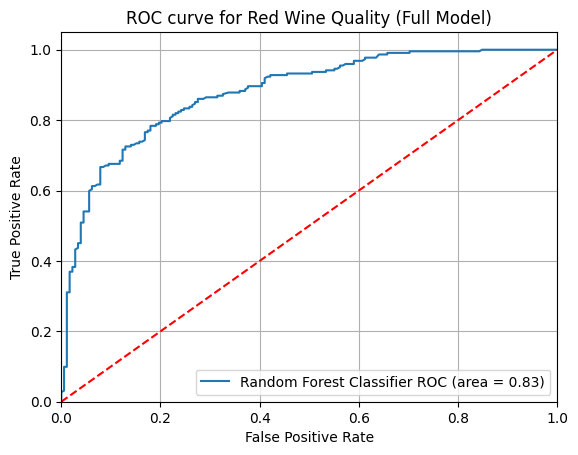

In [110]:
# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.8325
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(x_train, y_train) # train the model
    
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Red Wine Quality (Full Model)')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.grid(True)
plt.show() 

### ------------------------------------- End of Random Forest Classification ----------------------------------------

## (5) Gradient Boosting Classification

In [94]:
# Import the library
from sklearn.ensemble import AdaBoostClassifier

# Define the models
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier()
}

In [96]:
# Model performance for Training and Testing Set
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.7548
- F1 score: 0.7549
- Precision: 0.7729
- Recall: 0.7583
- Roc Auc Score: 0.7546
----------------------------------
Model performance for Test set
- Accuracy: 0.7275
- F1 score: 0.7283
- Precision: 0.7811
- Recall: 0.7072
- Roc Auc Score: 0.7300


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7175
- F1 score: 0.7180
- Precision: 0.7535
- Recall: 0.7297
- Roc Auc Score: 0.7160


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7950
- F1 score: 0.7956
- Precision: 0.8431
- Recall: 0.7748
- Roc Auc Score: 0.7975


Gradient Boost
Model performance for Training se

In [97]:
# Hyperparameter Training for Gradient Boosting
gradient_parameter = {
    "loss": ['log_loss','deviance','exponential'],
    "criterion": ['friedman_mse','squared_error','mse'],
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500],
    "max_depth": [5, 8, 15, None, 10]
}

gradient_parameter

{'loss': ['log_loss', 'deviance', 'exponential'],
 'criterion': ['friedman_mse', 'squared_error', 'mse'],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500],
 'max_depth': [5, 8, 15, None, 10]}

In [98]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ("GradientBoost", GradientBoostingClassifier(), gradient_parameter)
                   ]

In [99]:

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,
                                   param_distributions = params,
                                   n_iter = 100,
                                   cv = 3,
                                   verbose = 2,
                                   n_jobs = -1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for GradientBoost -------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 8, 'loss': 'exponential', 'criterion': 'friedman_mse'}


In [103]:
# Gradiant Boosting best Parameters
models={
    
    "GradientBoostclassifier":GradientBoostingClassifier(n_estimators=500,
                                                        min_samples_split=20,
                                                        max_depth=15,
                                                        loss='exponential',
                                                        criterion='friedman_mse')
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('='*35)
    print('\n')

GradientBoostclassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8000
- F1 score: 0.8002
- Precision: 0.8257
- Recall: 0.8108
- Roc Auc Score: 0.7987




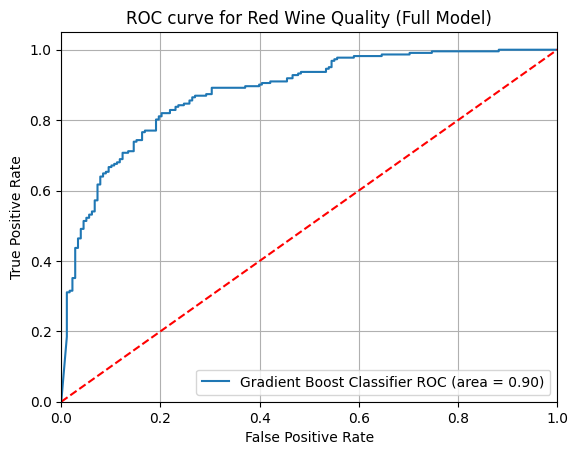

In [109]:
# Gradient Boost Classifier ROC plot
auc_models = [
{
    'label': 'Gradient Boost Classifier',
    'model':GradientBoostingClassifier(n_estimators=500,
                                                        min_samples_split=20,
                                                        max_depth=15,
                                                        loss='exponential',
                                                        criterion='friedman_mse'),
    'auc':  0.9026
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(x_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Red Wine Quality (Full Model)')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.grid(True)
plt.show() 

### ---------------------- End of Gradient Boosting Classification ----------------------------------------------------